Fitting 5 folds for each of 40 candidates, totalling 200 fits
SVM Evaluation Metrics 
      Metric    Score
0   Accuracy   98.650
1  Precision   97.440
2     Recall  100.000
3   F1 Score   98.700
4        MCC   97.329


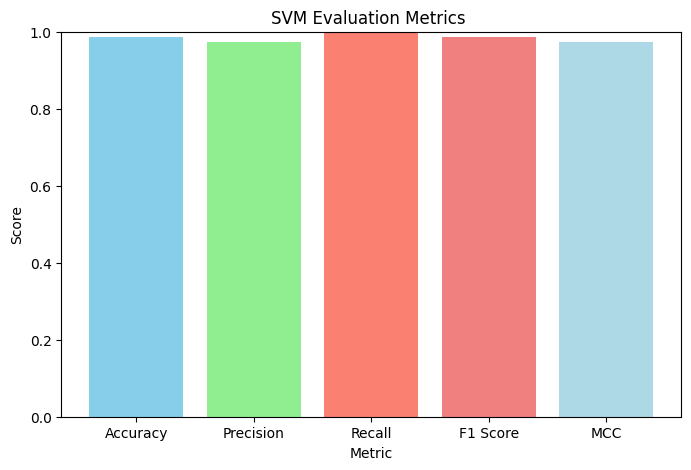

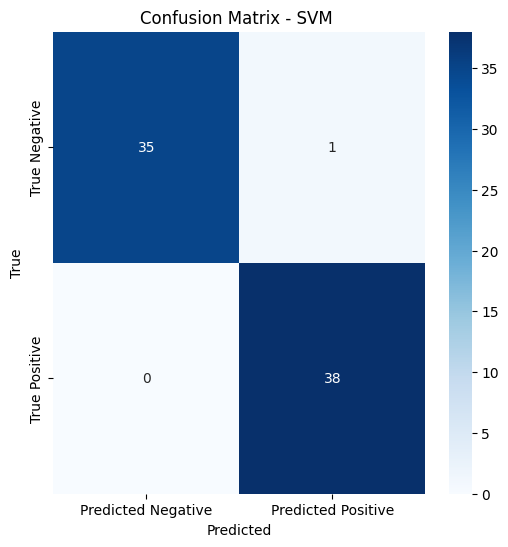

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Download data from URL
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
    data_file.write(url_content)

# Read dataset
df = pd.read_csv('data.csv')

# Separate features and target
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split (no PCA now)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# SVM Hyperparameter Grid
param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['poly'], 'degree': [2, 3, 4]},
    {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1]},
]

# GridSearchCV for best SVM
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_macro', verbose=1)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print Results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy * 100, 2), round(precision * 100, 2), round(recall * 100, 2), round(f1 * 100, 2), round(mcc * 100, 4)]
})

print("SVM Evaluation Metrics ")
print(results)

# Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores = results['Score'].values / 100

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('SVM Evaluation Metrics ')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix Plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM ')
plt.savefig("confusion_matrix_SVM.png", dpi=300)
plt.show()

